In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from nbodykit.lab import LinearMesh, cosmology

cosmo = cosmology.Cosmology()

ImportError: dlopen(/Users/anirbanroy/opt/anaconda3/lib/python3.7/site-packages/mpi4py/MPI.cpython-37m-darwin.so, 2): Library not loaded: @rpath/libmpi.12.dylib
  Referenced from: /Users/anirbanroy/opt/anaconda3/lib/python3.7/site-packages/mpi4py/MPI.cpython-37m-darwin.so
  Reason: image not found

In [6]:
cosmo = cosmo.clone(h=0.5, nonlinear=True)
Plin = cosmology.LinearPower(cosmo, redshift=0, transfer='EisensteinHu')
mesh = LinearMesh(Plin, Nmesh=128, BoxSize=500, seed=42)
mm=mesh.preview(axes=[0,1,2])
delta_f = mm.flatten()
hist1, bine1 = np.histogram(delta_f, bins=100, density=True)

/Users/anirbanroy/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/nbodykit/source/mesh/linear.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mask = numpy.bitwise_and.reduce([ki == 0 for ki in k])


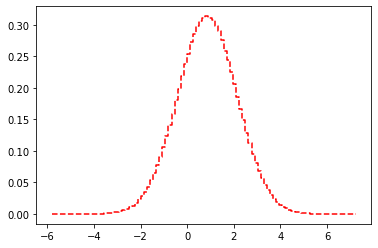

In [7]:
#plt.step(bine[:-1], hist ,color='b',linestyle='--')
plt.step(bine1[:-1], hist1 ,color='r',linestyle='--')

In [9]:
h_array = [0.5, 0.60, 0.70, 0.80, 0.90]
hist_array = []
bins_end = []

for i in range(len(h_array)):
    cosmo = cosmo.clone(h = h_array[i], nonlinear=True)
    Plin = cosmology.LinearPower(cosmo, redshift=0, transfer='EisensteinHu')
    print("creating mesh for h=", h_array[i])
    mesh = LinearMesh(Plin, Nmesh=128, BoxSize=500, seed=42*i)
    
    print("Claculating mesh quantities")
    mm=mesh.preview(axes=[0,1,2])
    delta_f = mm.flatten()
    hist, bine = np.histogram(delta_f, bins=50, density = True)
    
    hist_array.append(hist), bins_end.append(bine)
    
    

creating mesh for h= 0.5
Claculating mesh quantities
creating mesh for h= 0.6
Claculating mesh quantities
creating mesh for h= 0.7
Claculating mesh quantities
creating mesh for h= 0.8
Claculating mesh quantities
creating mesh for h= 0.9
Claculating mesh quantities


Text(0.5, 0, 'Density')

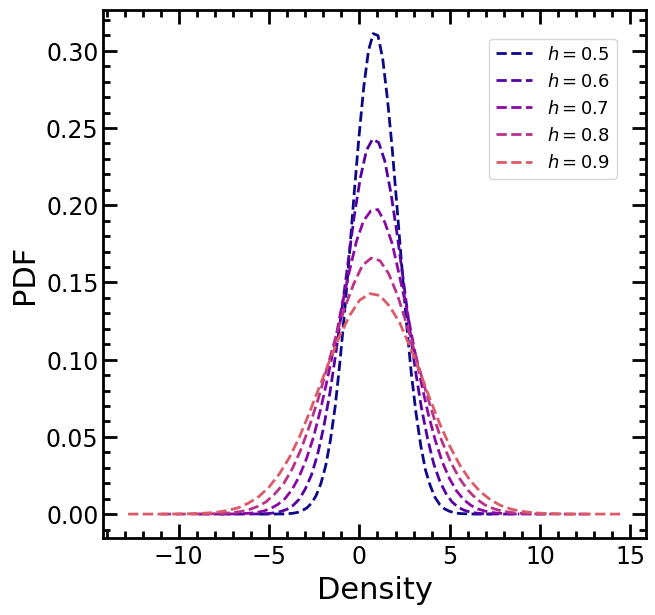

In [10]:
from limpy.plotsettings import *
plt.figure(figsize=[7,7], dpi=100)

num_plots = 8
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.plasma(np.linspace(0, 1, num_plots))))


for i in range(len(h_array)):
    plt.plot(bins_end[i][:-1], hist_array[i],linestyle='--', lw=2, label = "$h=%.1f$" %(h_array[i]))
    
plt.legend(loc=0)

plt.ylabel("PDF")
plt.xlabel("Density")

In [11]:
om_array = [0.15, 0.18, 0.21, 0.24, 0.27, 0.3]

hist_array1 = []
bins_end1 = []

for i in range(len(h_array)):
    cosmo = cosmo.clone(Omega_cdm = om_array[i], nonlinear=True)
    Plin = cosmology.LinearPower(cosmo, redshift=0, transfer='EisensteinHu')
    print("creating mesh for om=", om_array[i])
    mesh = LinearMesh(Plin, Nmesh=128, BoxSize=500, seed=42*i)
    
    print("Claculating mesh quantities")
    mm=mesh.preview(axes=[0,1,2])
    delta_f = mm.flatten()
    hist, bine = np.histogram(delta_f, bins=50, density = True)
    
    hist_array1.append(hist), bins_end1.append(bine)

creating mesh for om= 0.15
Claculating mesh quantities
creating mesh for om= 0.18
Claculating mesh quantities
creating mesh for om= 0.21
Claculating mesh quantities
creating mesh for om= 0.24
Claculating mesh quantities
creating mesh for om= 0.27
Claculating mesh quantities


Text(0.5, 0, 'Density')

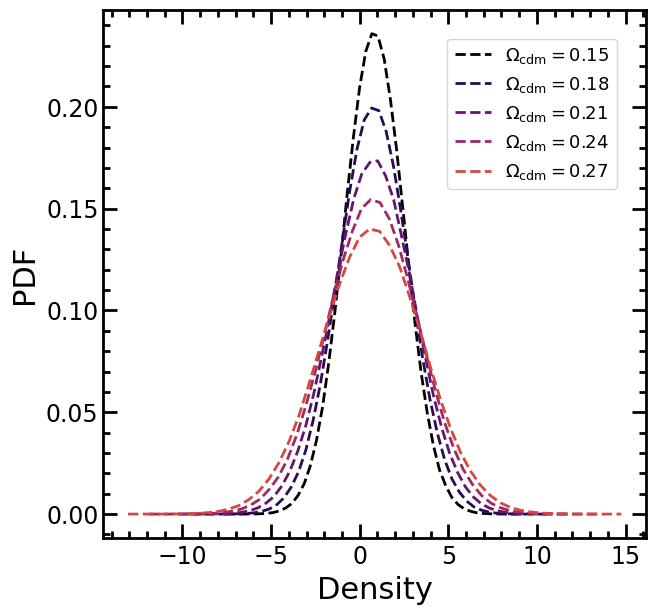

In [12]:
from limpy.plotsettings import *
plt.figure(figsize=[7,7], dpi=100)

num_plots = 8
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.inferno(np.linspace(0, 1, num_plots))))


for i in range(len(h_array)):
    plt.plot(bins_end1[i][:-1], hist_array1[i],linestyle='--', lw=2, label = r"$\Omega_{\rm cdm}=%.2f$" %(om_array[i]))
    
plt.legend(loc=0)

plt.ylabel("PDF")
plt.xlabel("Density")

Text(0.5, 0, 'Density')

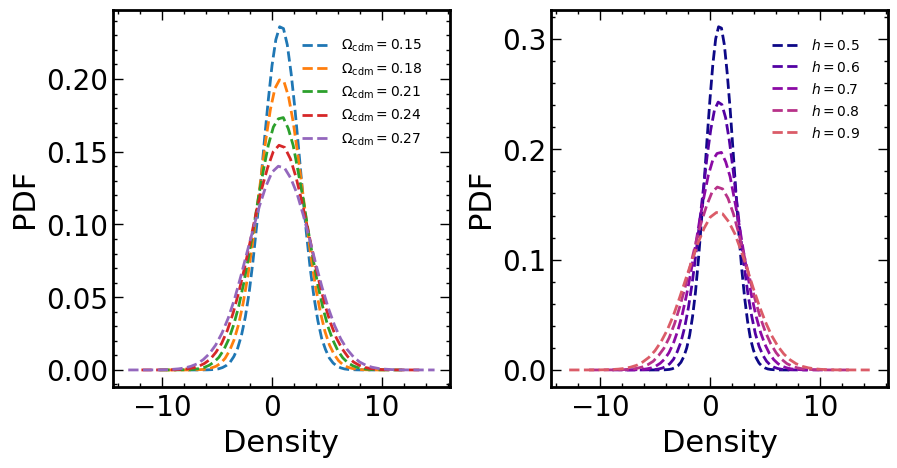

In [13]:
from matplotlib import gridspec
fig = plt.figure(figsize=(10, 5), dpi=100)
gs = gridspec.GridSpec(1, 2, wspace=0.3, hspace=0.3  , height_ratios=[1], figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1] , sharex=ax1)

tick_num = 4
legend_fontsize=15
tick_labelsize=20

ax1.tick_params('both', which='major', labelsize=tick_labelsize, length=7, width=1, direction='in', top=True, right=True)
ax1.tick_params('both', which='minor',labelsize=tick_labelsize,  length=3, width=1, direction='in', top=True, right=True)

ax2.tick_params('both', which='major', labelsize=tick_labelsize, length=7, width=1, direction='in', top=True, right=True)
ax2.tick_params('both', which='minor', labelsize=tick_labelsize, length=3, width=1, direction='in', top=True, right=True)





############################################################################
# For axis 1
############################################################################

num_plots = 8
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.inferno(np.linspace(0, 1, num_plots))))


for i in range(len(h_array)):
    ax1.plot(bins_end1[i][:-1], hist_array1[i],linestyle='--', lw=2, label = r"$\Omega_{\rm cdm}=%.2f$" %(om_array[i]))
    
ax1.legend(loc=0, frameon=False, fontsize=10)

ax1.set_ylabel("PDF")
ax1.set_xlabel("Density")


############################################################################
# For axis 2
############################################################################
num_plots = 8
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.plasma(np.linspace(0, 1, num_plots))))


for i in range(len(h_array)):
    ax2.plot(bins_end[i][:-1], hist_array[i],linestyle='--', lw=2, label = "$h=%.1f$" %(h_array[i]))
    
ax2.legend(loc=0, frameon=False, fontsize=10)

ax2.set_ylabel("PDF")
ax2.set_xlabel("Density")




In [101]:
hist1

array([3.61189469e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.08356841e-05, 1.08356841e-05, 1.08356841e-05,
       7.22378938e-06, 1.80594082e-05, 3.25070522e-05, 5.41784204e-05,
       7.22378938e-05, 1.55311472e-04, 1.40863639e-04, 3.32294312e-04,
       3.39518101e-04, 5.49007002e-04, 8.09064411e-04, 1.12691114e-03,
       1.68675177e-03, 2.48859544e-03, 3.46380701e-03, 4.20423783e-03,
       5.90183593e-03, 7.74751411e-03, 1.06333988e-02, 1.33278914e-02,
       1.76910442e-02, 2.29138599e-02, 2.83389002e-02, 3.48114410e-02,
       4.32451761e-02, 5.33729197e-02, 6.45734533e-02, 7.73378193e-02,
       9.11352857e-02, 1.06117370e-01, 1.23425610e-01, 1.41593432e-01,
       1.58486220e-01, 1.80544046e-01, 1.98419345e-01, 2.18407537e-01,
       2.38117635e-01, 2.54468644e-01, 2.72387303e-01, 2.85866888e-01,
       2.97937700e-01, 3.05786478e-01, 3.11363241e-01, 3.13887955e-01,
       3.11381160e-01, 3.08426633e-01, 2.98501425e-01, 2.90374400e-01,
      

In [14]:
import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

In [97]:
num_dim = 2
prior = utils.BoxUniform(low= torch.tensor([0.5, 0.15]), high= torch.tensor([0.9, 0.30]))

In [149]:
cosmo = cosmology.Cosmology()

def simulator(parameter_set):
    print("parameter set", parameter_set)
    parameter_set = parameter_set.numpy()
    h = parameter_set[0]
    
    om_m = parameter_set[1]
    cosmo = cosmology.Cosmology()
    
    cosmo = cosmo.clone(h = h, Omega_cdm= om_m, nonlinear=True)
    mesh = LinearMesh(Plin, Nmesh=128, BoxSize=500, seed=42*i)
    
    mm=mesh.preview(axes=[0,1,2])
    delta_f = mm.flatten()
    hist, bine = np.histogram(delta_f, bins=100, density = True)
    
    return torch.tensor(hist)
    
posterior = infer(simulator, prior, method="SNPE", num_simulations=200)

parameter set tensor([[0.7927, 0.1514],
        [0.5213, 0.1614]])
parameter set tensor([0.5011, 0.2776])


Running 200 simulations.:   0%|          | 0/200 [00:00<?, ?it/s]

parameter set tensor([0.8901, 0.2465])
parameter set tensor([0.6212, 0.1714])
parameter set tensor([0.5522, 0.2535])
parameter set tensor([0.6167, 0.1849])
parameter set tensor([0.8027, 0.2974])
parameter set tensor([0.7934, 0.2247])
parameter set tensor([0.6751, 0.2367])
parameter set tensor([0.6531, 0.2030])
parameter set tensor([0.8097, 0.1869])
parameter set tensor([0.6369, 0.2031])
parameter set tensor([0.8743, 0.1902])
parameter set tensor([0.5848, 0.1847])
parameter set tensor([0.8351, 0.1597])
parameter set tensor([0.6023, 0.1609])
parameter set tensor([0.6151, 0.2413])
parameter set tensor([0.7489, 0.1571])
parameter set tensor([0.5447, 0.2764])
parameter set tensor([0.5988, 0.1705])
parameter set tensor([0.5317, 0.2305])
parameter set tensor([0.7077, 0.2217])
parameter set tensor([0.8326, 0.2956])
parameter set tensor([0.7692, 0.2658])
parameter set tensor([0.5764, 0.2312])
parameter set tensor([0.7345, 0.1813])
parameter set tensor([0.7194, 0.2543])
parameter set tensor([0.7

In [150]:
cosmo = cosmo.clone(h = 0.71, nonlinear=True)
Plin = cosmology.LinearPower(cosmo, redshift=0, transfer='EisensteinHu')
print("creating mesh for h=", h_array[i])
mesh = LinearMesh(Plin, Nmesh=128, BoxSize=500, seed=42*i)

print("Claculating mesh quantities")
mm=mesh.preview(axes=[0,1,2])
delta_f = mm.flatten()
hist, bine = np.histogram(delta_f, bins=100, density = True)

creating mesh for h= 0.9
Claculating mesh quantities


In [151]:
observation = torch.tensor(hist)

samples = posterior.sample((10000,), x=observation)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

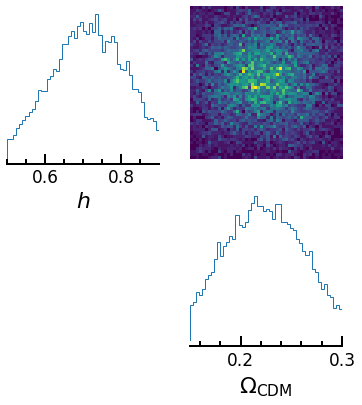

In [153]:
log_probability = posterior.log_prob(samples, x=observation)
_ = analysis.pairplot(samples, limits=[[0.5, 0.9], [0.15, 0.3]],
                      labels=[r'$h$', r'$\Omega_{\rm CDM}$'], figsize=(6, 6))